In [2]:
import pandas
from matplotlib import pyplot


%matplotlib inline
pyplot.style.use('seaborn')

## Plotting raw and normalized data

In [3]:
def read_data(fname):
    df = pandas.read_csv(fname, dtype='h')
    df['t'] = df['t'].diff().cumsum() * 1e-6
    df.loc[0, 't'] = 0.
    df = df.set_index('t')
    return df

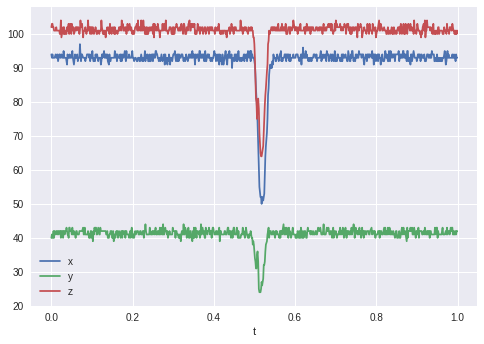

In [50]:
read_data('data/1-0.csv')[:1].plot()

In [77]:
from pathlib import Path


def normalize(df):
    df = df.astype(float)
    df /= df[:100].mean()
    df -= 1
    zone = df[df['x'] < -0.2]
    diff = zone.index[-1] - zone.index[0]
    t0 = zone.index[0] - diff
    t1 = zone.index[-1] + diff
    df = df[t0:t1]
    df = df.rolling(2).mean().dropna()
    df.index -= df.index[0]
    return df


def load_data(coin):    
    data = []
    for fname in Path('data').glob('%s-*.csv' % coin):
        df = read_data(fname)
        df = normalize(df)
        data.append(df)
    return data


c1 = load_data(1)
c2 = load_data(2)

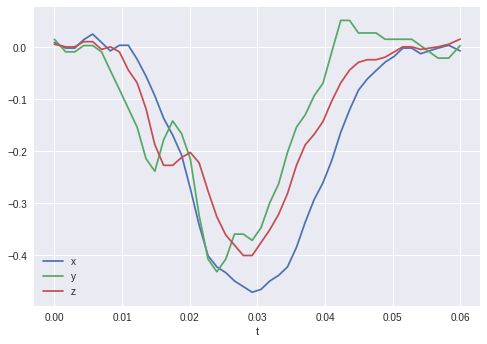

In [87]:
c1[0].plot()

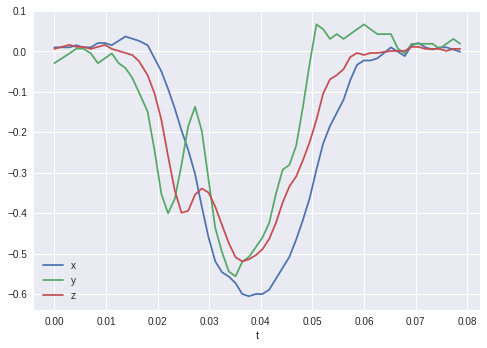

In [88]:
c2[0].plot()

## Finding differences between 1 € and 2 € coins

In [97]:
def d0(curve):
    diff = 0
    low = curve[0]
    d0_low = low
    for value in curve:
        low = min(low, value)
        d = value - low
        if d > diff:
            diff = d
            d0_low = low
        if value == curve.min():
            break
    return d0_low, diff

In [98]:
def features(curve, coin):
    l0_x, d0_x = d0(curve['x'])
    l0_y, d0_y = d0(curve['y'])
    l0_z, d0_z = d0(curve['z'])
    features = {
        'coin': coin,
        'min_x': curve['x'].min(),
        'min_y': curve['y'].min(),
        'min_z': curve['z'].min(),
        'l0_x': l0_x,
        'l0_y': l0_y,
        'l0_z': l0_z,
        'd0_x': d0_x,
        'd0_y': d0_y,
        'd0_z': d0_z,
    }
    return features


def data_features(c1, c2):
    data = zip(c1 + c2, ['1 €'] * 10 + ['2 €'] * 10)
    return pandas.DataFrame([features(curve, coin) for curve, coin in data])


df = data_features(c1, c2)

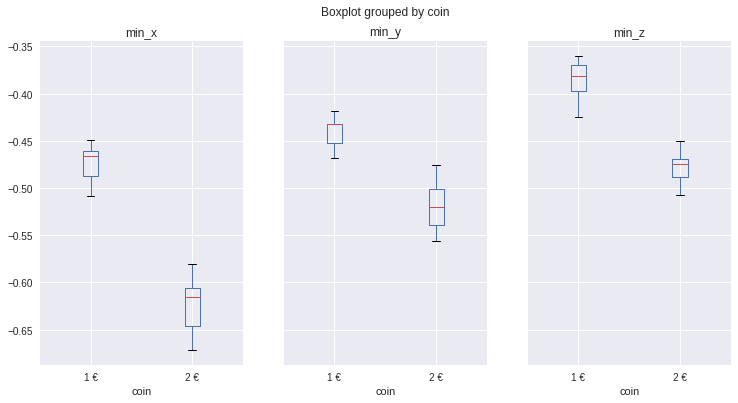

In [99]:
def compare_min(df):
    df.boxplot(['min_x', 'min_y', 'min_z'], by='coin',
               layout=(1, 3), figsize=(12, 6))


compare_min(df)

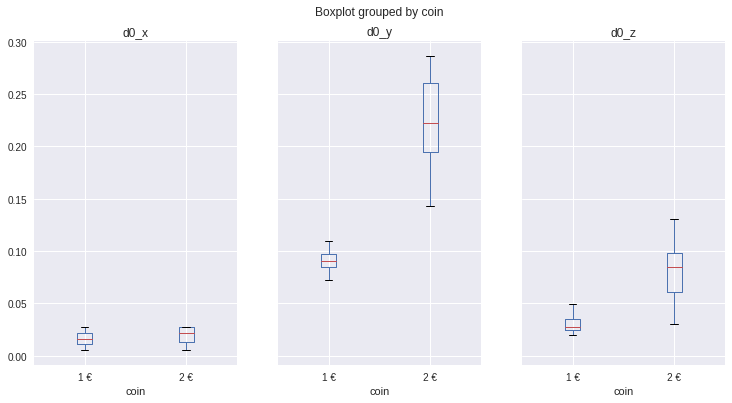

In [101]:
def compare_d0(df):
    df.boxplot(['d0_x', 'd0_y', 'd0_z'], by='coin',
               layout=(1, 3), figsize=(12, 6))


compare_d0(df)

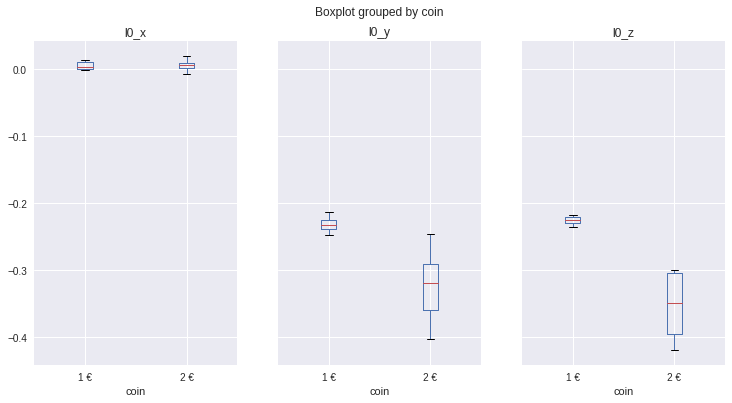

In [102]:
def compare_l0(df):
    df.boxplot(['l0_x', 'l0_y', 'l0_z'], by='coin',
               layout=(1, 3), figsize=(12, 6))


compare_l0(df)